In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model3_0 = Model1(
    norm=nn.BatchNorm2d(10),
    post_conv=post_conv0,
    ratio=3
)
he_initialization(model3_0)
describe(model3_0)

MACs: 14.24 MMac, Params: 12.2 k
Layer (type:depth-idx)                   Output Shape              Param #
Model1                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 64, 64]           1,000
│    └─Sequential: 2-2                   [1, 20, 64, 64]           --
│    │    └─BatchNorm2d: 3-1             [1, 20, 64, 64]           40
│    │    └─PReLU: 3-2                   [1, 20, 64, 64]           1
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           990
│    └─Sequential: 2-4                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-3             [1, 10, 64, 64]           20
│    │    └─PReLU: 3-4                   [1, 10, 64, 64]           1
├─Sequential: 1-3                        [1, 1, 16, 16]            --
│    └─Conv2d: 2-5                       [1, 12, 3

Loading checkpoint from model_weights/model3_0.pt
Starting
Epoch 1/10: Train loss = 0.5767, Train accuracy = 0.6922, Test loss = 0.5747, Test accuracy = 0.6917


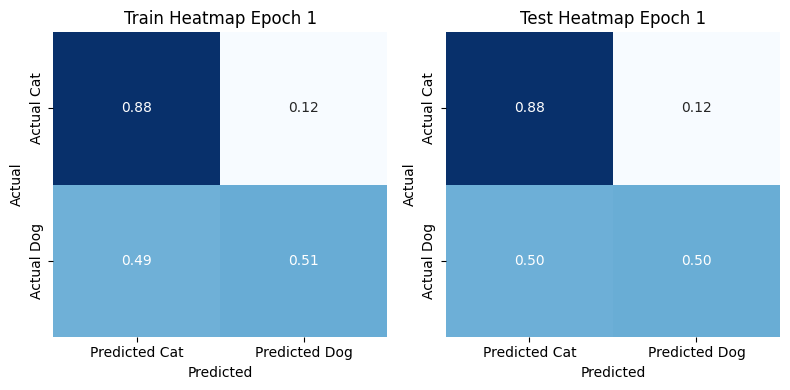

Epoch 2/10: Train loss = 0.5042, Train accuracy = 0.7557, Test loss = 0.5129, Test accuracy = 0.7467


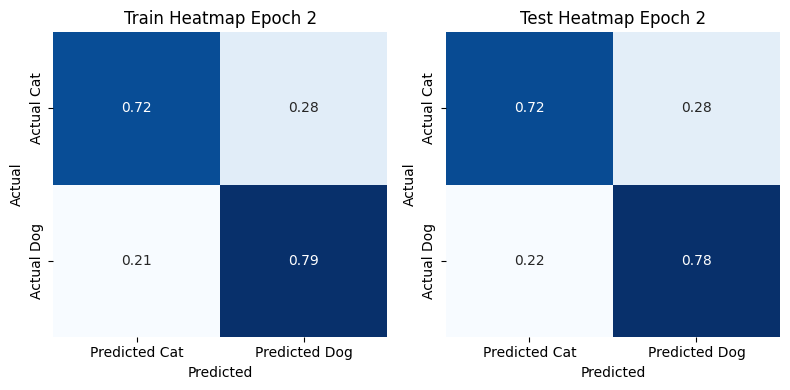

Epoch 3/10: Train loss = 0.4589, Train accuracy = 0.7814, Test loss = 0.4768, Test accuracy = 0.7758


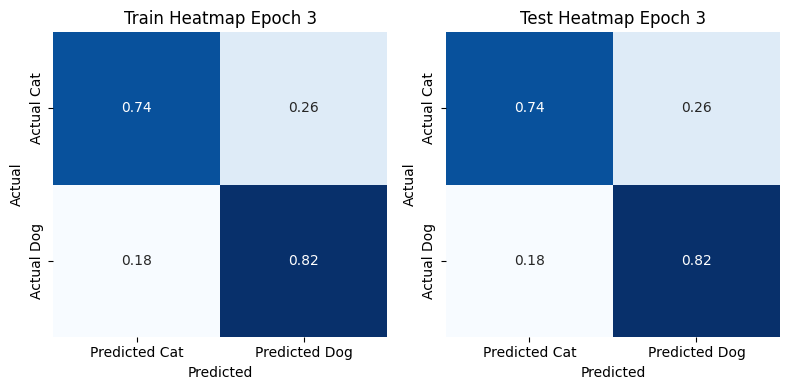

Epoch 4/10: Train loss = 0.4301, Train accuracy = 0.8003, Test loss = 0.4468, Test accuracy = 0.7906


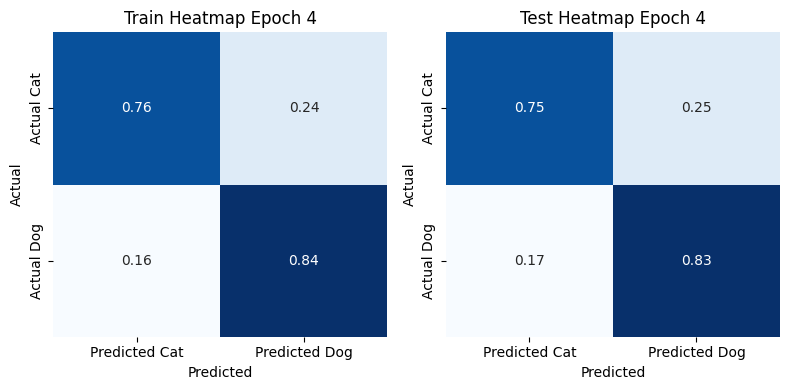

Epoch 5/10: Train loss = 0.3963, Train accuracy = 0.8196, Test loss = 0.4195, Test accuracy = 0.8058


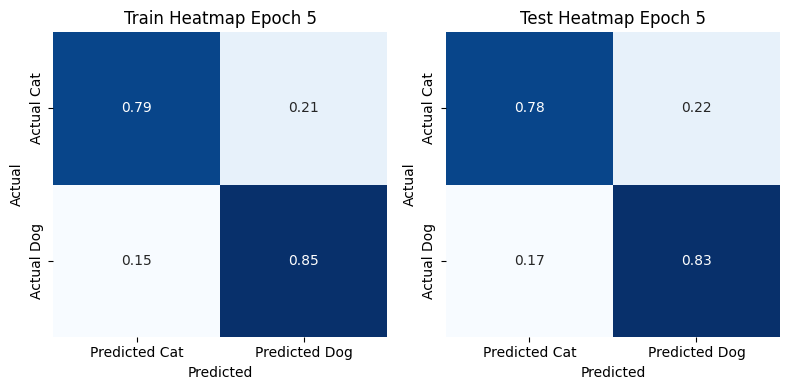

Epoch 6/10: Train loss = 0.3761, Train accuracy = 0.8278, Test loss = 0.4185, Test accuracy = 0.8067


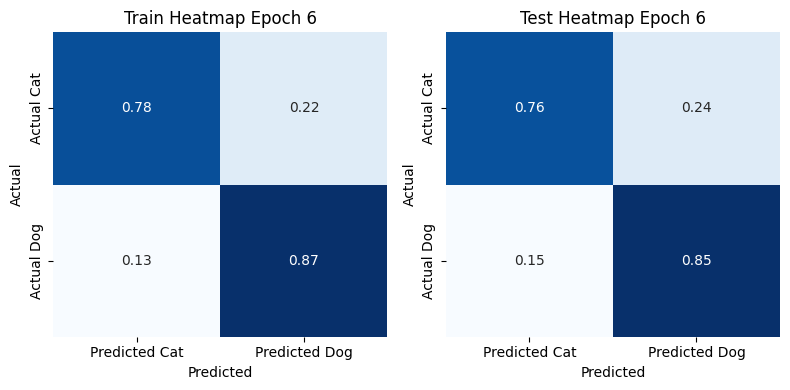

Epoch 7/10: Train loss = 0.3656, Train accuracy = 0.8384, Test loss = 0.4036, Test accuracy = 0.8126


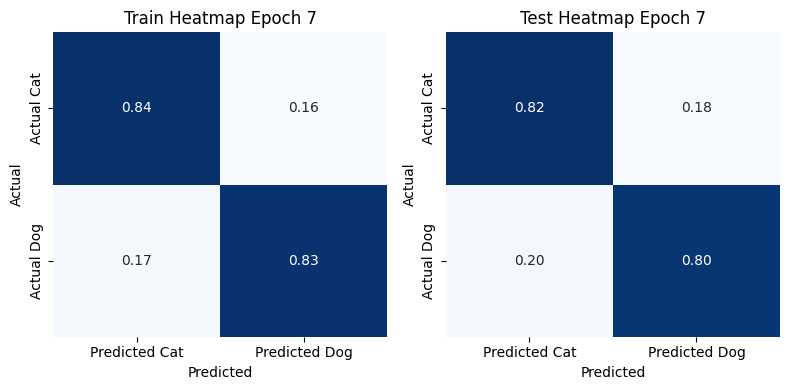

Epoch 8/10: Train loss = 0.3399, Train accuracy = 0.8496, Test loss = 0.3990, Test accuracy = 0.8175


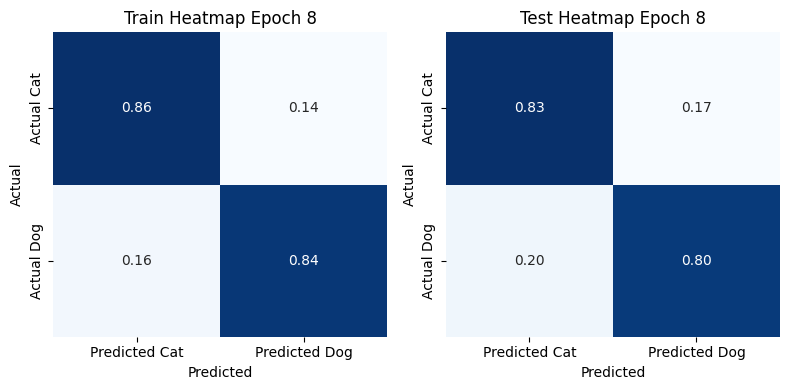

Epoch 9/10: Train loss = 0.3305, Train accuracy = 0.8545, Test loss = 0.4021, Test accuracy = 0.8193


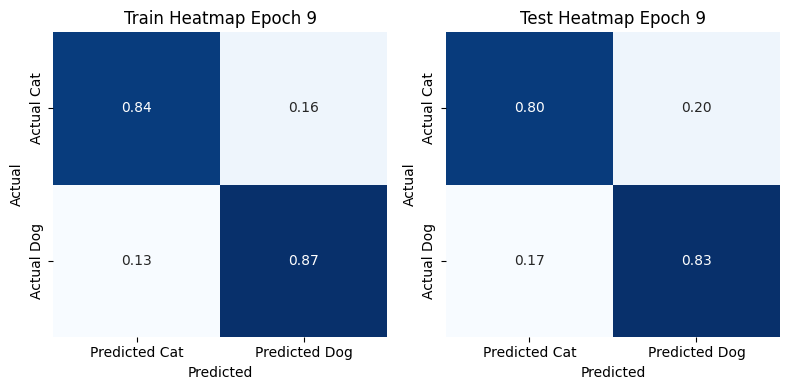

Epoch 10/10: Train loss = 0.3282, Train accuracy = 0.8560, Test loss = 0.4027, Test accuracy = 0.8199


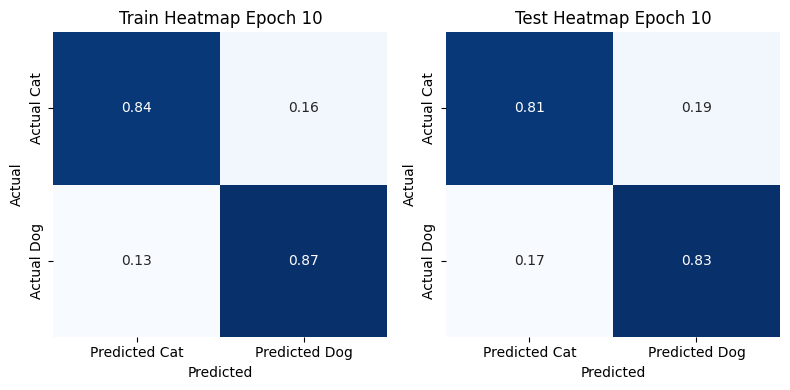

Training complete.


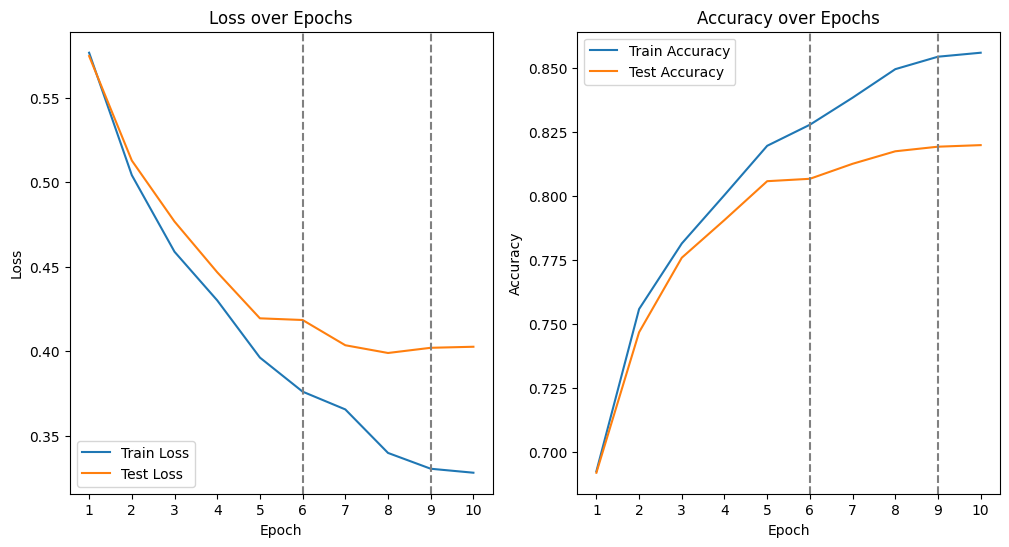

In [5]:
train(model3_0,"model_weights/model3_0.pt",criterion,train_dataset,test_dataset)